In [34]:
import pandas as pd

# CSV 파일 로드
file_path = "제주특별자치도_제주지역_내국인_유형별_관광_업종_결제데이터_20170216.csv"
data0 = pd.read_csv(file_path, encoding='cp949')

# 데이터 확인
data0.head()

,지역구분,지역구분_시,지역구분_도심/도심외,지역구분_읍/면/동,관광업종 구분,회원 유형,회원 성별,회원 연령대,회원 거주지,2014-09~2015-08 카드이용금액,2014-09 ~ 2015-08 카드이용건수,2014-09~2015-08 카드이용자수,2015-09~2016-08 카드이용금액,2015-09~2016-08 카드이용건수,2015-09~2016-08 카드이용자수,데이터기준일자
0,제주도,전체,전체,전체,교통,내국인,남,20대 미만,제주,19650725,479,68,29843198,851,197,2017-02-16
1,제주도,전체,전체,전체,교통,내국인,남,20대,제주,2089069468,56192,6528,2711132135,73278,7948,2017-02-16
2,제주도,전체,전체,전체,교통,내국인,남,30대,제주,10164021228,205373,15016,10459317336,220460,15330,2017-02-16
3,제주도,전체,전체,전체,교통,내국인,남,40대,제주,22623678695,367138,20886,20797744658,368599,21333,2017-02-16
4,제주도,전체,전체,전체,교통,내국인,남,50대,제주,24392770471,361576,19359,20730544586,358093,19643,2017-02-16


In [35]:
# 결측치가 있는 행 삭제
data_cleaned = data0.dropna()

# 삭제된 행의 수 확인
deleted_rows = len(data0) - len(data_cleaned)
print("삭제된 행의 수:", deleted_rows)

# 삭제된 행이 어떤 데이터였는지 확인
print("삭제된 행의 데이터:")
print(data0[data0.isnull().any(axis=1)])


삭제된 행의 수: 0
삭제된 행의 데이터:
Empty DataFrame
Columns: [지역구분, 지역구분_시, 지역구분_도심/도심외, 지역구분_읍/면/동, 관광업종 구분, 회원 유형, 회원 성별, 회원 연령대, 회원 거주지, 2014-09~2015-08 카드이용금액, 2014-09 ~ 2015-08 카드이용건수, 2014-09~2015-08 카드이용자수, 2015-09~2016-08 카드이용금액, 2015-09~2016-08 카드이용건수, 2015-09~2016-08 카드이용자수, 데이터기준일자]
Index: []


In [36]:
# 데이터 프레임 'data'에서 '제주'를 제외한 데이터 추출
data1 = data0[(data0['회원 거주지'] != '제주')]

# 사용할 열 선택
selected_columns = ['관광업종 구분', '회원 연령대', '2014-09~2015-08 카드이용금액', '2015-09~2016-08 카드이용금액']
data_selected = data1[selected_columns]
data_selected.head()

,관광업종 구분,회원 연령대,2014-09~2015-08 카드이용금액,2015-09~2016-08 카드이용금액
84,교통,20대 미만,4996012,20680973
85,교통,20대,3471476430,5440342564
86,교통,30대,12222560526,14288412960
87,교통,40대,12615797032,14654711931
88,교통,50대,9426160316,10582888267


In [37]:
# import pandas as pd
# from sklearn.cluster import KMeans
# from sklearn.preprocessing import OneHotEncoder

# # 범주형 데이터 원-핫 인코딩
# encoded_df = pd.get_dummies(data_selected, columns=['관광업종 구분', '회원 성별', '회원 연령대'])

# # 수치형 데이터 추가
# encoded_df[['2014-09~2015-08 카드이용금액', '2015-09~2016-08 카드이용금액']] = data_selected[['2014-09~2015-08 카드이용금액', '2015-09~2016-08 카드이용금액']]

# print(encoded_df.head())
# print()
# print()
# print()
# # k-means 클러스터링 수행
# kmeans = KMeans(n_clusters=3, random_state=42)
# kmeans.fit(encoded_df)

# # 클러스터링 결과 확인
# encoded_df['cluster_label'] = kmeans.labels_
# print(encoded_df)

In [38]:
# from sklearn.preprocessing import LabelEncoder

# # 레이블 인코더 생성
# label_encoder = LabelEncoder()

# # 관광업종 구분 데이터 변환
# tourism_categories = ["교통", "문화/레저", "소매", "쇼핑", "숙박", "식음료", "유흥"]
# encoded_tourism_categories = label_encoder.fit_transform(tourism_categories)
# data_selected['encoded_tourism_categories'] = encoded_tourism_categories[0]

# # 회원 연령대 데이터 변환
# age_groups = ["20대 미만", "20대", "30대", "40대", "50대", "60대 이상"]
# encoded_age_groups = label_encoder.fit_transform(age_groups)
# data_selected['encoded_age_groups'] = encoded_age_groups[0]

# # 결과 출력
# print("Encoded tourism categories:", encoded_tourism_categories)
# print("Encoded age groups:", encoded_age_groups)

In [39]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
# 관광업종 구분 데이터 변환
tourism_categories = ["교통", "문화/레져", "소매", "쇼핑", "숙박", "식음료", "유흥"]
encoded_tourism_categories = label_encoder.fit_transform(tourism_categories)
tourism_category_mapping = dict(zip(tourism_categories, encoded_tourism_categories))
data_selected['encoded_tourism_categories'] = data_selected['관광업종 구분'].map(tourism_category_mapping)

# # 회원 연령대 데이터 변환
# age_groups = ["20대 미만", "20대", "30대", "40대", "50대", "60대이상"]
# encoded_age_groups = label_encoder.fit_transform(age_groups)
# age_group_mapping = dict(zip(age_groups, encoded_age_groups))
# data_selected['encoded_age_groups'] = data_selected['회원 연령대'].map(age_group_mapping)

# 회원 연령대 수동 매핑
age_group_mapping = {
    "20대 미만": 0,
    "20대": 1,
    "30대": 2,
    "40대": 3,
    "50대": 4,
    "60대이상": 5
}

# 데이터에 수동 매핑 적용
data_selected['encoded_age_groups'] = data_selected['회원 연령대'].map(age_group_mapping)

# 결과 출력
print("Encoded tourism categories:", tourism_category_mapping)
print("Encoded age groups:", age_group_mapping)


Encoded tourism categories: {'교통': 0, '문화/레져': 1, '소매': 2, '쇼핑': 3, '숙박': 4, '식음료': 5, '유흥': 6}
Encoded age groups: {'20대 미만': 0, '20대': 1, '30대': 2, '40대': 3, '50대': 4, '60대이상': 5}


/tmp/ipykernel_1618/561001994.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_selected['encoded_tourism_categories'] = data_selected['관광업종 구분'].map(tourism_category_mapping)
/tmp/ipykernel_1618/561001994.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_selected['encoded_age_groups'] = data_selected['회원 연령대'].map(age_group_mapping)


In [40]:

hi = data_selected[(data_selected['관광업종 구분'] == '교통')]
hi.head()


,관광업종 구분,회원 연령대,2014-09~2015-08 카드이용금액,2015-09~2016-08 카드이용금액,encoded_tourism_categories,encoded_age_groups
84,교통,20대 미만,4996012,20680973,0,0
85,교통,20대,3471476430,5440342564,0,1
86,교통,30대,12222560526,14288412960,0,2
87,교통,40대,12615797032,14654711931,0,3
88,교통,50대,9426160316,10582888267,0,4


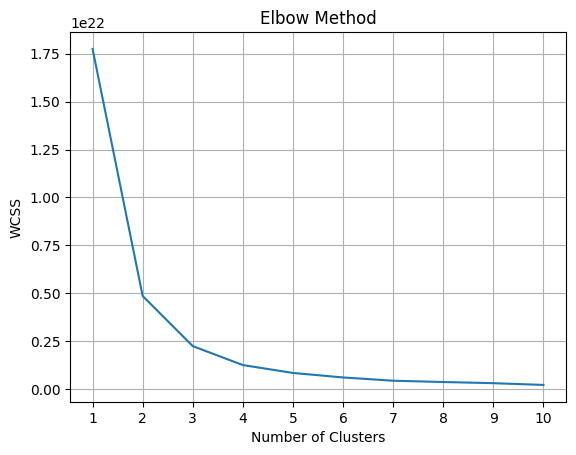

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

# # 데이터셋 준비
# label_encoder = LabelEncoder()
# tourism_categories = ["교통", "문화/레저", "소매", "쇼핑", "숙박", "식음료", "유흥"]
# age_groups = ["20대 미만", "30대", "40대", "50대", "60대 이상"]

# # 레이블 인코딩
# encoded_tourism_categories = label_encoder.fit_transform(tourism_categories)
# encoded_age_groups = label_encoder.fit_transform(age_groups)

# 데이터셋 준비
X = data_selected[['encoded_tourism_categories', 'encoded_age_groups', '2014-09~2015-08 카드이용금액', '2015-09~2016-08 카드이용금액']].values

# 클러스터 개수에 따른 WCSS 계산
wcss = []
for i in range(1, 11):  # 클러스터 개수를 1부터 10까지 변화시켜가며 WCSS를 계산
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# WCSS를 그래프로 나타내기
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.xticks(np.arange(1, 11, 1))
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


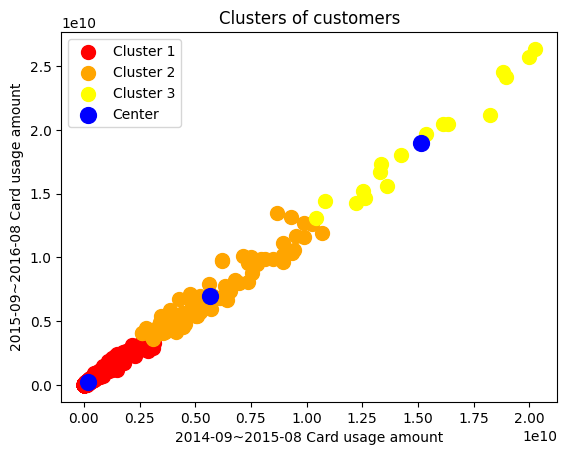

Cluster Centers:
[[2.85832138e+00 2.83034433e+00 1.72909967e+08 2.13836882e+08]
 [2.62962963e+00 2.88888889e+00 5.65985977e+09 6.98018740e+09]
 [3.23529412e+00 2.82352941e+00 1.51283820e+10 1.89353255e+10]]


In [47]:
# K = 3으로 설정

# K-Means 클러스터링 수행
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0)
y_kmeans = kmeans.fit_predict(X)

# 클러스터링 결과 시각화
plt.scatter(X[y_kmeans == 0, 2], X[y_kmeans == 0, 3], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 2], X[y_kmeans == 1, 3], s=100, c='orange', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 2], X[y_kmeans == 2, 3], s=100, c='yellow', label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], s=130, c='blue', label='Center')
plt.title('Clusters of customers')
plt.xlabel('2014-09~2015-08 Card usage amount')
plt.ylabel('2015-09~2016-08 Card usage amount')
plt.legend()
plt.show()

# 클러스터링 중심점 출력
print("Cluster Centers:")
print(kmeans.cluster_centers_)

In [54]:
import pandas as pd
import numpy as np

# 클러스터별로 데이터를 그룹화
data_selected['Cluster'] = y_kmeans
clusters = data_selected.groupby('Cluster')

# 각 클러스터 내에서 'encoded_tourism_categories' 및 'encoded_age_groups'의 분산 계산
means = clusters[['encoded_tourism_categories', 'encoded_age_groups']].mean()
variances = clusters[['encoded_tourism_categories', 'encoded_age_groups']].var()

# 분산 출력
print("Variance within each cluster:")
print(variances)


Variance within each cluster:
         encoded_tourism_categories  encoded_age_groups
Cluster                                                
0                          3.587024            2.224884
1                          3.286111            1.850000
2                          2.316176            0.654412


/tmp/ipykernel_1618/976795927.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_selected['Cluster'] = y_kmeans


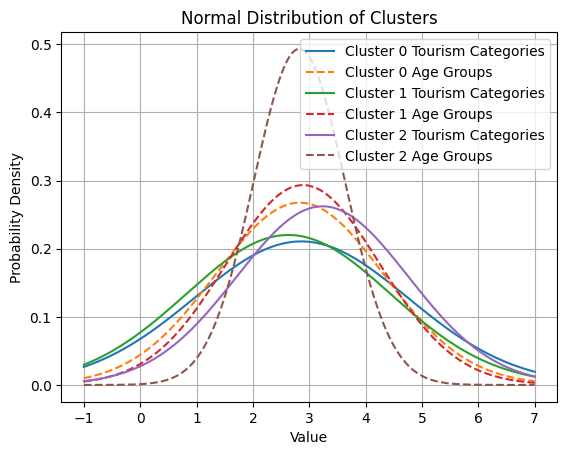

In [57]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from scipy.stats import norm

# 정규분포 그래프를 그림
x = np.linspace(-1, 7, 1000)

# 각 클러스터에 대한 정규분포 그래프 그리기
for cluster in range(kmeans.n_clusters):
    mean = means.iloc[cluster]
    variance = variances.iloc[cluster]
    
    # 'encoded_tourism_categories'에 대한 정규분포
    y = norm.pdf(x, mean['encoded_tourism_categories'], np.sqrt(variance['encoded_tourism_categories']))
    plt.plot(x, y, label=f'Cluster {cluster} Tourism Categories')
    
    # 'encoded_age_groups'에 대한 정규분포
    y = norm.pdf(x, mean['encoded_age_groups'], np.sqrt(variance['encoded_age_groups']))
    plt.plot(x, y, '--', label=f'Cluster {cluster} Age Groups')

plt.title('Normal Distribution of Clusters')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()


In [44]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X, y_kmeans)
print("The average silhouette score:", silhouette_avg)

The average silhouette score: 0.932844809218738
